## This codes were written and executed in google colab

In [48]:
############################## HomeWork no.8 MLZoomcamp ##############################
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

In [ ]:
############################ Download Data ###############################
!wget https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip
!unzip train.zip

In [34]:
############################ Classify dataset folder ############################
image_names = os.listdir('train')

In [35]:
#### Get photo numbers
len(image_names)

25000

In [36]:
dogs = []
cats = []
for name in image_names:
  if('dog' in name):
    dogs.append(name)
  else :
    cats.append(name)

len(dogs)

12500

In [38]:
############################## Creating folders ##############################
!mkdir Train
!mkdir Train/dog
!mkdir Train/cat
!mkdir Valid
!mkdir Valid/dog
!mkdir Valid/cat

In [57]:
############################## Moving images to folders ##############################

## First 10000 is for training 
## the remaining 2500 is for validation

## for dogs
for i in range(0,12500):
  if i <= 10000:
    command = 'mv  train/' + dogs[i] + '  ./Train/dog'
    os.system(command= command)
  else:
    command = 'mv  train/' + dogs[i] + '  ./Valid/dog'
    os.system(command= command)

## For cats
for i in range(0,10000):
  if i <= 10000:
    command = 'mv  train/' + cats[i] + '  ./Train/cat'
    os.system(command= command)
  else:
    command = 'mv  train/' + cats[i] + '  ./Valid/cat'
    os.system(command= command)


In [40]:
############################ CREATE MODEL ############################

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

# Question 1

For out binary classification problem **BinaryCrossentropy** is the best loss function.



# Question 2

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

In [59]:
################# Get training dataset from directory ################# 
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    "Train/",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary",
    shuffle=True
)

train_ds.class_indices

Found 20001 images belonging to 2 classes.


{'cat': 0, 'dog': 1}

In [60]:
################# Get validation dataset from directory ################# 

valid_generator = ImageDataGenerator(rescale=1./255)

valid_ds = valid_generator.flow_from_directory(
    "./Valid/",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary",
    shuffle=True
)

valid_ds.class_indices

Found 2499 images belonging to 2 classes.


{'cat': 0, 'dog': 1}

In [62]:
################### train the model ###################
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=valid_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 42s 411ms/step - loss: 0.6935 - accuracy: 0.5175 - val_loss: 0.6123 - val_accuracy: 0.9940
Epoch 2/10
100/100 [==============================] - 41s 407ms/step - loss: 0.6887 - accuracy: 0.5305 - val_loss: 0.7995 - val_accuracy: 0.0570
Epoch 3/10
100/100 [==============================] - 41s 410ms/step - loss: 0.6845 - accuracy: 0.5485 - val_loss: 0.6436 - val_accuracy: 0.7140
Epoch 4/10
100/100 [==============================] - 41s 409ms/step - loss: 0.6751 - accuracy: 0.5800 - val_loss: 0.5762 - val_accuracy: 0.8710
Epoch 5/10
100/100 [==============================] - 41s 408ms/step - loss: 0.6736 - accuracy: 0.5725 - val_loss: 0.4229 - val_accuracy: 0.9980
Epoch 6/10
100/100 [==============================] - 40s 403ms/step - loss: 0.6668 - accuracy: 0.5770 - val_loss: 0.6717 - val_accuracy: 0.5360
Epoch 7/10
100/100 [==============================] - 41s 409ms/step - loss: 0.6584 - accuracy: 0.6025 - val_loss: 0.7800 - val_ac

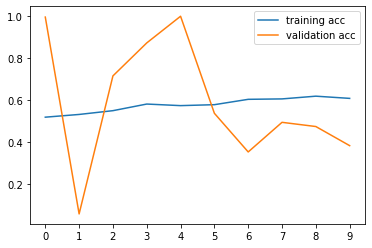

In [63]:
plt.plot(history.history["accuracy"], label="training acc")
plt.plot(history.history["val_accuracy"], label="validation acc")
plt.xticks(np.arange(10))
plt.legend()
plt.show()

# Question 3

In [64]:
## Calculate accuracy for training history
np.median(history.history["accuracy"]).round(3)

0.578

# Question 4

In [65]:
## Calculate standar deviation for loss values
np.std(history.history["loss"]).round(3)

0.017

### Data Augmentation

In [66]:
train_gen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_ds_aug = train_gen_aug.flow_from_directory(
    "./Train",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary",
    shuffle=True
)

Found 20001 images belonging to 2 classes.


In [68]:
### Try training using augemted data
augmented_history = model.fit(
    train_ds_aug,
    steps_per_epoch=100,
    epochs=10,
    validation_data=valid_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 49s 492ms/step - loss: 0.6652 - accuracy: 0.5960 - val_loss: 0.6230 - val_accuracy: 0.6080
Epoch 2/10
100/100 [==============================] - 49s 491ms/step - loss: 0.6640 - accuracy: 0.5850 - val_loss: 0.5358 - val_accuracy: 0.7710
Epoch 3/10
100/100 [==============================] - 49s 491ms/step - loss: 0.6597 - accuracy: 0.5905 - val_loss: 0.5436 - val_accuracy: 0.7790
Epoch 4/10
100/100 [==============================] - 49s 490ms/step - loss: 0.6626 - accuracy: 0.5985 - val_loss: 0.5217 - val_accuracy: 0.8250
Epoch 5/10
100/100 [==============================] - 49s 490ms/step - loss: 0.6570 - accuracy: 0.5945 - val_loss: 0.6478 - val_accuracy: 0.5370
Epoch 6/10
100/100 [==============================] - 49s 490ms/step - loss: 0.6486 - accuracy: 0.5980 - val_loss: 0.6054 - val_accuracy: 0.5960
Epoch 7/10
100/100 [==============================] - 49s 491ms/step - loss: 0.6527 - accuracy: 0.6230 - val_loss: 0.5414 - val_ac

# Question 5

In [70]:
np.mean(augmented_history.history["val_loss"]).round(3)

0.555

# Question 6

In [71]:
np.mean(augmented_history.history["val_accuracy"][5:]).round(3)


0.732